## Image Classification Using Convolutional Neural Networks -- Fashion MNIST Dataset

### Install Dependencies

In [0]:
!pip install tensorflow_datasets --user

### Setting Up

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

from matplotlib import style

import logging
import math
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

style.use('ggplot')
tf.get_logger().setLevel(logging.ERROR)

TensorFlow 2.x selected.


### Load the Dataset

In [0]:
dataset, metadata = tfds.load("fashion_mnist", 
                              as_supervised=True, 
                              with_info=True)

train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
print(dataset)
print(metadata)
print(train_dataset)
print(test_dataset)

{'test': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, 'train': <_OptionsDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}
tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=1.0.0,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    urls=['https://github.com/zalandoresearch/fashion-mnist'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgra

In [0]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of Training Features : {}".format(num_train_examples))
print("Number of Testing Features  : {}".format(num_test_examples))

Number of Training Features : 60000
Number of Testing Features  : 10000


In [0]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


### Normalization of the Data

In [0]:
def normalization(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

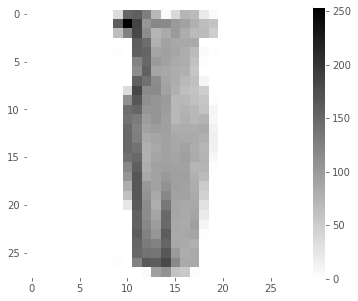

(28, 28)
[[  0   0   0   0   0   0   0   0   0  35 153 159 128  71   5  38  74  68
   21   5   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 161 254 186 104 120 117 101  93  79
   65  60   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  65 126 183 115  74  85 101  82  68
   68  49   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 161 145  79  93  87  87  85
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0 159 153  90  95  90  82  68
    5   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 123 148 101  93  85  82  63
    2   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 115 156  90  87  82  79  57
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 159 142 115  90  82  71  63
   10   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  35 183 117 1

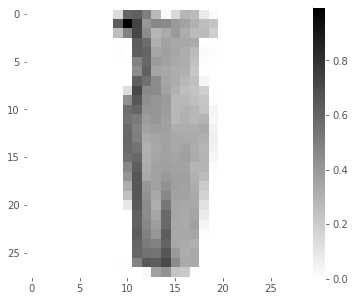

(28, 28)
tf.Tensor(
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.13725491 0.6        0.62352943
  0.5019608  0.2784314  0.01960784 0.14901961 0.2901961  0.26666668
  0.08235294 0.01960784 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.6313726  0.99607843 0.7294118
  0.40784314 0.47058824 0.45882353 0.39607844 0.3647059  0.30980393
  0.25490198 0.23529412 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.25490198 0.49411765 0.7176471
  0.4509804  0.2901961  0.33333334 0.39607844 0.32156864 0.26666668
  0.26666668 0.19215687 0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         

In [0]:
for train_img, train_lab in train_dataset.take(1):
  break

train_img = train_img.numpy().reshape((28, 28))

plt.figure(figsize=(6, 5))
plt.imshow(train_img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print(train_img.shape)
print(train_img)

####

train_img, train_lab = normalization(train_img, train_lab)

plt.figure(figsize=(6, 5))
plt.imshow(train_img, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

print(train_img.shape)
print(train_img)

In [0]:
train_dataset = train_dataset.map(normalization)
test_dataset = test_dataset.map(normalization)

train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

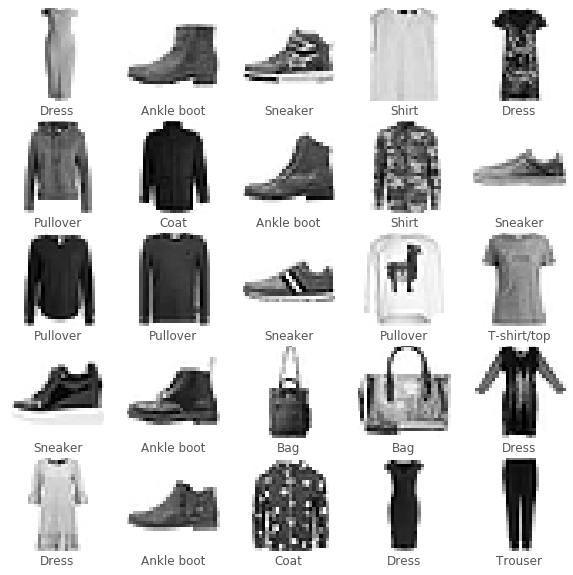

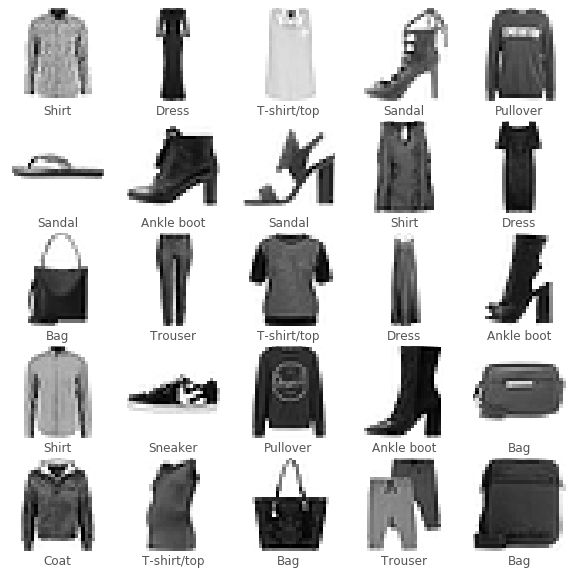

In [0]:
plt.figure(figsize=(10, 10))

i = 0
for train_img, train_lab in train_dataset.take(25):
  train_img = train_img.numpy().reshape((28, 28))

  plt.subplot(5, 5, i+1)
  plt.imshow(train_img, cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_labels[train_lab])
  i += 1

plt.show()

print("\n\n\n")

plt.figure(figsize=(10, 10))

i = 0
for test_img, test_lab in test_dataset.take(25):
  test_img = test_img.numpy().reshape((28, 28))

  plt.subplot(5, 5, i+1)
  plt.imshow(test_img, cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_labels[test_lab])
  i += 1

plt.show()

In [0]:
for train_img, train_lab in train_dataset.take(1):
  break

input_shape = train_img.shape
input_shape = tuple(input_shape)
input_shape

(28, 28, 1)

### Build the Model

In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=(3, 3), 
                         padding='same', 
                         activation=tf.nn.relu, 
                         input_shape=input_shape), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         padding='same', 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=128, activation=tf.nn.relu), 
  tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

### Compile the Model

In [0]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

### Fit the Model

In [0]:
model_1.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3981 - accuracy: 0.8569
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2673 - accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2125 - accuracy: 0.9220
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1879 - accuracy: 0.9304
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1570 - accuracy: 0.9419
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1358 - accuracy: 0.9499
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1142 - accuracy: 0.9577
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0970 - accuracy: 0.9642
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0831 - accuracy: 0.9698
Epoch 10/10
1875/1875 [==============================] - 8s

### Evaluate Accuracy

In [0]:
test_loss, test_accuracy = model_1.evaluate(test_dataset, steps=math.ceil(num_test_examples/BATCH_SIZE))

print("Accuracy of the model : {}".format(test_accuracy))

313/313 [==============================] - 4s 11ms/step - loss: 0.2932 - accuracy: 0.9216
Accuracy of the model : 0.9215999841690063


### Make Predictions

In [0]:
for test_img, test_lab in test_dataset.take(1):
  test_img = test_img.numpy()
  test_lab = test_lab
  predictions = model_1.predict(test_img)

In [0]:
predictions.shape

(32, 10)

In [0]:
predictions[0]

array([7.9169404e-10, 1.1684793e-10, 6.0895911e-07, 1.1712000e-09,
       1.0587777e-02, 1.1224150e-11, 9.8941165e-01, 9.7957178e-13,
       1.9068028e-11, 4.8407127e-09], dtype=float32)

In [0]:
for i in range(BATCH_SIZE):
  if np.argmax(predictions[i]) == test_lab[i]:
    print("{} -->  {} -->  Confidence : {}".format(True, class_labels[np.argmax(predictions[i])], predictions[i][np.argmax(predictions[i])]))
  else:
    print(False)

True -->  Shirt -->  Confidence : 0.9894116520881653
True -->  Dress -->  Confidence : 0.9999903440475464
True -->  T-shirt/top -->  Confidence : 0.6009377837181091
True -->  Sandal -->  Confidence : 0.9990437626838684
True -->  Pullover -->  Confidence : 0.9991129040718079
True -->  Sandal -->  Confidence : 1.0
True -->  Ankle boot -->  Confidence : 1.0
True -->  Sandal -->  Confidence : 1.0
True -->  Shirt -->  Confidence : 0.8117629885673523
True -->  Dress -->  Confidence : 0.9994470477104187
True -->  Bag -->  Confidence : 1.0
True -->  Trouser -->  Confidence : 1.0
True -->  T-shirt/top -->  Confidence : 0.9854055643081665
True -->  Dress -->  Confidence : 0.9999865293502808
True -->  Ankle boot -->  Confidence : 0.7322294116020203
True -->  Shirt -->  Confidence : 0.9999548196792603
True -->  Sneaker -->  Confidence : 1.0
True -->  Pullover -->  Confidence : 0.9984582662582397
True -->  Ankle boot -->  Confidence : 1.0
True -->  Bag -->  Confidence : 0.9999992847442627
True --> 

### Beautiful Plots

In [0]:
def plot_the_image(index_img, prediction_array, actual_labels, images_tested):
  
  prediction_array = prediction_array[index_img]
  actual_label = actual_labels[index_img]
  image_testing = images_tested[index_img]

  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(image_testing[..., 0], cmap=plt.cm.binary)

  prediction_label = np.argmax(prediction_array)

  if prediction_label == actual_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}%  ({})".format(class_labels[prediction_label], 
                                      100*np.max(prediction_array), 
                                      class_labels[actual_label]), color=color)

def plot_predicted_array(index_img, prediction_array, actual_labels):
  
  prediction_array = prediction_array[index_img]
  actual_label = actual_labels[index_img]

  plt.grid(False)
  plt.xticks(range(10))
  this_plot = plt.bar(range(10), prediction_array, color='#777777')
  plt.ylim([0, 1])

  this_plot[np.argmax(prediction_array)].set_color('red')
  this_plot[actual_label].set_color('green')

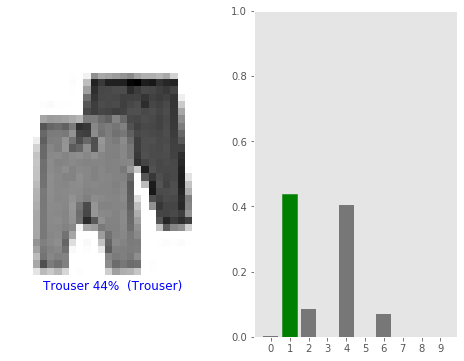

In [0]:
index_img = 23
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plot_the_image(index_img=index_img, 
               prediction_array=predictions, 
               actual_labels=test_lab, 
               images_tested=test_img)
plt.subplot(1, 2, 2)
plot_predicted_array(index_img=index_img, 
                     prediction_array=predictions, 
                     actual_labels=test_lab)
plt.show()

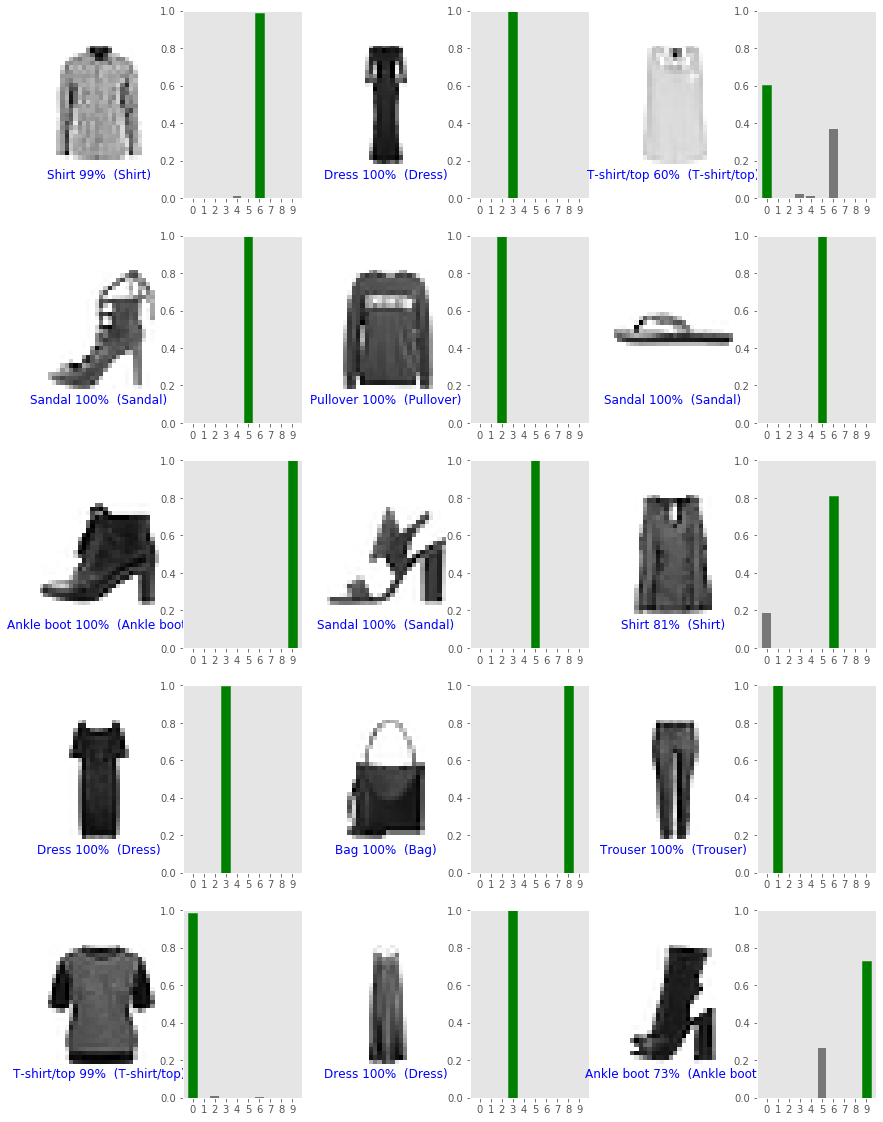

In [0]:
num_rows = 5
num_cols = 3
total_grid = num_rows * num_cols

plt.figure(figsize=((2*2+1)*num_cols, (2*2)*num_rows))

for img_index in range(total_grid):
  plt.subplot(num_rows, 2*num_cols, 2*img_index+1)
  plot_the_image(index_img=img_index, 
                 prediction_array=predictions, 
                 actual_labels=test_lab, 
                 images_tested=test_img)
  
  plt.subplot(num_rows, 2*num_cols, 2*img_index+2)
  plot_predicted_array(index_img=img_index, 
                       prediction_array=predictions, 
                       actual_labels=test_lab)

plt.show()

In [0]:
ind = 0

image = test_img[ind]
# print(image)
print(image.shape)
print(test_lab)

image = np.array([image])
# print(image)
print(image.shape)

(28, 28, 1)
tf.Tensor([6 3 0 5 2 5 9 5 6 3 8 1 0 3 9 6 7 2 9 8 4 0 8 1 8 8 1 5 7 4 2 4], shape=(32,), dtype=int64)
(1, 28, 28, 1)


In [0]:
predict_single = model_1.predict(image)
print(predict_single)

[[7.9169243e-10 1.1684816e-10 6.0895911e-07 1.1711977e-09 1.0587782e-02
  1.1224192e-11 9.8941165e-01 9.7957374e-13 1.9068028e-11 4.8407127e-09]]


In [0]:
print(np.argmax(predict_single))

6


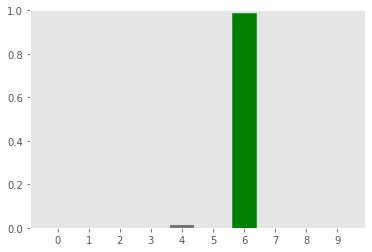

In [0]:
plot_predicted_array(index_img=ind, 
                     prediction_array=predict_single, 
                     actual_labels=test_lab)
plt.show()

In [0]:
if np.argmax(predict_single) == test_lab[ind]:
  print("{} --> {} -->  Confidence : {}".format(True, class_labels[np.argmax(predict_single)], 
                                                100*predict_single[ind][np.argmax(predict_single[ind])]))
else:
  print(False)

True --> Shirt -->  Confidence : 98.94116520881653
